In [1]:
import pandas as pd

In [2]:
df=pd.read_html('https://www.westmetall.com/en/markdaten.php?action=table&field=LME_Pb_cash')

In [3]:
print(df)

[                date LME Lead Cash-Settlement LME Lead 3-month LME Lead stock
0     28. April 2021                  2076.00          2097.50         111325
1     27. April 2021                  2051.00          2073.50         111200
2     26. April 2021                  2054.00          2076.00         112675
3     23. April 2021                  2021.00          2042.00         112975
4     22. April 2021                  2017.50          2040.00         113350
..               ...                      ...              ...            ...
79  08. January 2021                  2000.00          2019.50         131975
80  07. January 2021                  2026.50          2042.00         132125
81  06. January 2021                  2068.50          2081.50         132550
82  05. January 2021                  2043.50          2059.00         132750
83  04. January 2021                  2023.50          2042.00         133175

[84 rows x 4 columns],                   date LME Lead Cash-Se

In [4]:
print(len(df))
#Thus, there are 14 tables which have been found - df[0]...df[14]

14


In [5]:
for i in range(14):
  print(df[i].shape,'\n')

(84, 4) 

(265, 4) 

(264, 4) 

(264, 4) 

(262, 4) 

(264, 4) 

(264, 4) 

(264, 4) 

(264, 4) 

(263, 4) 

(262, 4) 

(264, 4) 

(264, 4) 

(184, 4) 



In [6]:
#we will create 'data' dataframe where all the dataframes have been appended
data=pd.DataFrame()
for i in range(14):
  data=data.append(df[i], ignore_index=True)
print(data)
print(data.shape)

                  date LME Lead Cash-Settlement LME Lead 3-month LME Lead stock
0       28. April 2021                  2076.00          2097.50         111325
1       27. April 2021                  2051.00          2073.50         111200
2       26. April 2021                  2054.00          2076.00         112675
3       23. April 2021                  2021.00          2042.00         112975
4       22. April 2021                  2017.50          2040.00         113350
...                ...                      ...              ...            ...
3427  08. January 2008                  2580.50          2600.00          49200
3428  07. January 2008                  2601.00          2611.00          48900
3429  04. January 2008                  2665.00          2670.00          46850
3430  03. January 2008                  2593.00          2601.00          46750
3431  02. January 2008                  2580.00          2580.00          45350

[3432 rows x 4 columns]
(3432, 4)


In [7]:
df1=data.reset_index()['LME Lead Cash-Settlement']
print(df1)
print(df1.shape)

0       2076.00
1       2051.00
2       2054.00
3       2021.00
4       2017.50
         ...   
3427    2580.50
3428    2601.00
3429    2665.00
3430    2593.00
3431    2580.00
Name: LME Lead Cash-Settlement, Length: 3432, dtype: object
(3432,)


In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [9]:
#df1.to_csv('df1.csv') some rows show 'LME Lead Cash Settlement'

In [10]:
df1 = df1.apply (pd.to_numeric, errors='coerce')
df1 = df1.apply (pd.to_numeric, errors='coerce')
df1 = df1.dropna()
#df1.to_csv('df1.csv') Now df1 stores only numeric values
print(df1)
print(type(df1))
print(df1.shape)

0       2076.0
1       2051.0
2       2054.0
3       2021.0
4       2017.5
         ...  
3427    2580.5
3428    2601.0
3429    2665.0
3430    2593.0
3431    2580.0
Name: LME Lead Cash-Settlement, Length: 3289, dtype: float64
<class 'pandas.core.series.Series'>
(3289,)


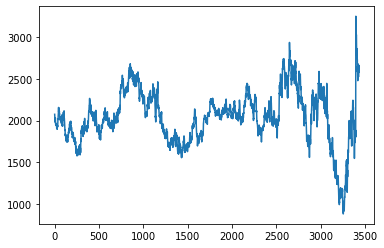

<Figure size 7200x7200 with 0 Axes>

In [11]:
from matplotlib import pyplot as plt
plt.plot(df1)
plt.figure(figsize=(100,100))
plt.show()


In [12]:
df1.shape

(3289,)

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1) #We have feature scaled using Normalisation. So, all values are now between 0 and 1.

[[0.5038972 ]
 [0.49336423]
 [0.49462819]
 ...
 [0.75205393]
 [0.72171898]
 [0.71624184]]


In [14]:
print(df1)

[[0.5038972 ]
 [0.49336423]
 [0.49462819]
 ...
 [0.75205393]
 [0.72171898]
 [0.71624184]]


In [15]:
#We split into train and test data. Lookback=100, Lookfront=66
training_size=int(len(df1)*0.90)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]
training_size,test_size

(2960, 329)

In [16]:
type(test_data)
type(train_data)

numpy.ndarray

In [17]:
print(train_data)
print(train_data.shape)

[[0.5038972 ]
 [0.49336423]
 [0.49462819]
 ...
 [0.4240573 ]
 [0.37708026]
 [0.3981462 ]]
(2960, 1)


In [18]:
print(test_data)
print(test_data.shape)

[[4.25953234e-01]
 [3.94143670e-01]
 [4.28481146e-01]
 [4.42595323e-01]
 [4.27217190e-01]
 [4.50389720e-01]
 [4.05519275e-01]
 [3.76869602e-01]
 [3.59174215e-01]
 [3.76658942e-01]
 [3.82978723e-01]
 [3.61912787e-01]
 [3.45060038e-01]
 [3.27785970e-01]
 [3.34737729e-01]
 [3.45060038e-01]
 [3.05034759e-01]
 [3.03560143e-01]
 [3.07983990e-01]
 [2.90288603e-01]
 [2.89445966e-01]
 [3.00821572e-01]
 [3.01032231e-01]
 [3.13882452e-01]
 [3.51590478e-01]
 [3.25679376e-01]
 [3.41478829e-01]
 [3.48851906e-01]
 [3.43374763e-01]
 [3.58120918e-01]
 [3.49273225e-01]
 [3.53065094e-01]
 [3.49694544e-01]
 [3.22308827e-01]
 [3.17253002e-01]
 [3.03349484e-01]
 [3.45481357e-01]
 [3.19780914e-01]
 [3.07562671e-01]
 [3.41268169e-01]
 [3.53907731e-01]
 [3.86138614e-01]
 [3.82136086e-01]
 [3.64230040e-01]
 [3.41268169e-01]
 [3.10090584e-01]
 [3.26311355e-01]
 [2.88813988e-01]
 [3.08615968e-01]
 [3.14935749e-01]
 [3.20202233e-01]
 [2.73857173e-01]
 [2.34674531e-01]
 [2.30672003e-01]
 [2.22877607e-01]
 [2.285654

In [19]:
def create_dataset(dataset, time_step=100):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape)
print(y_train.shape)
#Thus, number of training examples = 2859. 
#In each training example, number of days = 100
#For target ouput values of training examples = 2859 y values

(2859, 100)
(2859,)


In [21]:
print(X_test.shape)
print(ytest.shape)
#Thus, number of test examples = 2859. 
#In each test example, number of days = 100
#For target ouput values of test examples = 2859 y values

(228, 100)
(228,)


In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape)
print(X_test.shape)

(2859, 100, 1)
(228, 100, 1)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
45/45 [==============================] - 13s 183ms/step - loss: 0.0718 - val_loss: 0.0210
Epoch 2/100
45/45 [==============================] - 7s 155ms/step - loss: 0.0025 - val_loss: 0.0156
Epoch 3/100
45/45 [==============================] - 7s 154ms/step - loss: 0.0017 - val_loss: 0.0138
Epoch 4/100
45/45 [==============================] - 7s 151ms/step - loss: 0.0015 - val_loss: 0.0132
Epoch 5/100
45/45 [==============================] - 7s 153ms/step - loss: 0.0015 - val_loss: 0.0126
Epoch 6/100
45/45 [==============================] - 7s 156ms/step - loss: 0.0013 - val_loss: 0.0119
Epoch 7/100
45/45 [==============================] - 7s 153ms/step - loss: 0.0013 - val_loss: 0.0113
Epoch 8/100
45/45 [==============================] - 7s 153ms/step - loss: 0.0012 - val_loss: 0.0105
Epoch 9/100
45/45 [==============================] - 7s 152ms/step - loss: 0.0012 - val_loss: 0.0097
Epoch 10/100
45/45 [==============================] - 7s 153ms/step - loss: 0.0010 - val_l

In [25]:
import tensorflow as tf
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(X_train)
print(X_test)


[[[0.5038972 ]
  [0.49336423]
  [0.49462819]
  ...
  [0.47714346]
  [0.48304192]
  [0.4914683 ]]

 [[0.49336423]
  [0.49462819]
  [0.48072467]
  ...
  [0.48304192]
  [0.4914683 ]
  [0.48514851]]

 [[0.49462819]
  [0.48072467]
  [0.47925005]
  ...
  [0.4914683 ]
  [0.48514851]
  [0.49926269]]

 ...

 [[0.72087634]
  [0.71708447]
  [0.65725722]
  ...
  [0.38340004]
  [0.3981462 ]
  [0.38150411]]

 [[0.71708447]
  [0.65725722]
  [0.66210238]
  ...
  [0.3981462 ]
  [0.38150411]
  [0.4318517 ]]

 [[0.65725722]
  [0.66210238]
  [0.63829787]
  ...
  [0.38150411]
  [0.4318517 ]
  [0.4240573 ]]]
[[[0.42595323]
  [0.39414367]
  [0.42848115]
  ...
  [0.1777965 ]
  [0.19170002]
  [0.1855909 ]]

 [[0.39414367]
  [0.42848115]
  [0.44259532]
  ...
  [0.19170002]
  [0.1855909 ]
  [0.19106804]]

 [[0.42848115]
  [0.44259532]
  [0.42721719]
  ...
  [0.1855909 ]
  [0.19106804]
  [0.17063408]]

 ...

 [[0.40130609]
  [0.38971982]
  [0.39309037]
  ...
  [0.69327997]
  [0.73730777]
  [0.7164525 ]]

 [[0.389

In [26]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print("Train:")
print(train_predict)
print("Test:")
print(test_predict)

Train:
[[2046.535 ]
 [2034.1418]
 [2061.2996]
 ...
 [1796.2477]
 [1885.1835]
 [1893.4408]]
Test:
[[1340.0358 ]
 [1344.3329 ]
 [1324.7424 ]
 [1300.8446 ]
 [1271.9685 ]
 [1277.2562 ]
 [1275.5021 ]
 [1257.63   ]
 [1233.2438 ]
 [1206.4788 ]
 [1169.1187 ]
 [1122.5323 ]
 [1086.3971 ]
 [1067.6348 ]
 [1068.7242 ]
 [1062.6875 ]
 [1050.521  ]
 [1050.2737 ]
 [1051.8047 ]
 [1072.8656 ]
 [1087.4221 ]
 [1106.1812 ]
 [1130.9688 ]
 [1152.5107 ]
 [1161.5598 ]
 [1166.2145 ]
 [1170.5322 ]
 [1183.0996 ]
 [1188.5659 ]
 [1189.2354 ]
 [1199.2183 ]
 [1179.1914 ]
 [1157.8641 ]
 [1158.0671 ]
 [1162.8575 ]
 [1171.8768 ]
 [1175.0186 ]
 [1175.8899 ]
 [1148.497  ]
 [1133.172  ]
 [1133.5298 ]
 [1147.0311 ]
 [1154.5709 ]
 [1167.5474 ]
 [1166.4246 ]
 [1162.9397 ]
 [1141.328  ]
 [1145.7455 ]
 [1170.4281 ]
 [1177.7393 ]
 [1186.9532 ]
 [1189.5211 ]
 [1158.6382 ]
 [1116.7444 ]
 [1060.0399 ]
 [1018.3893 ]
 [ 984.6767 ]
 [ 963.9673 ]
 [ 955.92957]
 [ 948.4422 ]
 [ 942.81726]
 [ 953.5588 ]
 [ 974.0568 ]
 [ 995.3976 ]
 [1019.

In [27]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

2097.64840514257

In [28]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1762.9742119602045

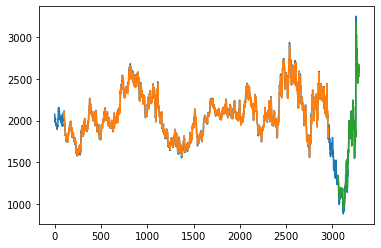

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
df1=scaler.inverse_transform(df1)
plt.plot(df1)#original values
plt.plot(trainPredictPlot)#already reverse scaled
plt.plot(testPredictPlot)#already reverse scaled
plt.show()

In [30]:
print(train_predict.shape)
print(test_predict.shape)

(2859, 1)
(228, 1)


# Predicting for next 66 days.

In [31]:
#Now we take first 100 days from X_test, and predict first day of ytest.
x_input_single=X_test[0]
x_input_single=x_input_single.reshape(1,x_input_single.shape[0],x_input_single.shape[1])
x_input_single.shape 
print(x_input_single) #this is going to be fed into our predictor

[[[0.42595323]
  [0.39414367]
  [0.42848115]
  [0.44259532]
  [0.42721719]
  [0.45038972]
  [0.40551928]
  [0.3768696 ]
  [0.35917422]
  [0.37665894]
  [0.38297872]
  [0.36191279]
  [0.34506004]
  [0.32778597]
  [0.33473773]
  [0.34506004]
  [0.30503476]
  [0.30356014]
  [0.30798399]
  [0.2902886 ]
  [0.28944597]
  [0.30082157]
  [0.30103223]
  [0.31388245]
  [0.35159048]
  [0.32567938]
  [0.34147883]
  [0.34885191]
  [0.34337476]
  [0.35812092]
  [0.34927323]
  [0.35306509]
  [0.34969454]
  [0.32230883]
  [0.317253  ]
  [0.30334948]
  [0.34548136]
  [0.31978091]
  [0.30756267]
  [0.34126817]
  [0.35390773]
  [0.38613861]
  [0.38213609]
  [0.36423004]
  [0.34126817]
  [0.31009058]
  [0.32631135]
  [0.28881399]
  [0.30861597]
  [0.31493575]
  [0.32020223]
  [0.27385717]
  [0.23467453]
  [0.230672  ]
  [0.22287761]
  [0.22856541]
  [0.22751211]
  [0.23425321]
  [0.27280388]
  [0.24436486]
  [0.22856541]
  [0.21697914]
  [0.24057299]
  [0.24478618]
  [0.23614915]
  [0.25005266]
  [0.25321

In [32]:
pred_single=model.predict(x_input_single)
print(pred_single.shape)
print(pred_single)

(1, 1)
[[0.19382165]]


In [35]:
#Now I will make predictions for next 66 days (3 months = 66 days in our dataset)
#pred_single=scaler.inverse_transform(pred_single)
pred_single_unscaled=scaler.inverse_transform(pred_single)
test_66=np.array(pred_single_unscaled)
print(test_66)

[[1340.0356]]


In [36]:
print(pred_single) #pred_single is scaled. Pred_single_unscaled is unscaled.

[[0.19382165]]


In [37]:
x_input=x_input_single;
pred_single=pred_single.reshape(1,1,1)
print("pred_single reshaped to 3d: ",pred_single.shape)
x_input=np.append(x_input, pred_single, axis=1)
print("x_input: ", x_input.shape)
print(x_input)

x_input=x_input[:,1:101,:]
print("x_input excluding first ele: ",x_input.shape)
print(x_input)


pred_single reshaped to 3d:  (1, 1, 1)
x_input:  (1, 101, 1)
[[[0.42595323]
  [0.39414367]
  [0.42848115]
  [0.44259532]
  [0.42721719]
  [0.45038972]
  [0.40551928]
  [0.3768696 ]
  [0.35917422]
  [0.37665894]
  [0.38297872]
  [0.36191279]
  [0.34506004]
  [0.32778597]
  [0.33473773]
  [0.34506004]
  [0.30503476]
  [0.30356014]
  [0.30798399]
  [0.2902886 ]
  [0.28944597]
  [0.30082157]
  [0.30103223]
  [0.31388245]
  [0.35159048]
  [0.32567938]
  [0.34147883]
  [0.34885191]
  [0.34337476]
  [0.35812092]
  [0.34927323]
  [0.35306509]
  [0.34969454]
  [0.32230883]
  [0.317253  ]
  [0.30334948]
  [0.34548136]
  [0.31978091]
  [0.30756267]
  [0.34126817]
  [0.35390773]
  [0.38613861]
  [0.38213609]
  [0.36423004]
  [0.34126817]
  [0.31009058]
  [0.32631135]
  [0.28881399]
  [0.30861597]
  [0.31493575]
  [0.32020223]
  [0.27385717]
  [0.23467453]
  [0.230672  ]
  [0.22287761]
  [0.22856541]
  [0.22751211]
  [0.23425321]
  [0.27280388]
  [0.24436486]
  [0.22856541]
  [0.21697914]
  [0.2405

In [38]:
pred=model.predict(x_input)
print(pred)
print(pred.shape)
pred_unscaled=scaler.inverse_transform(pred)
print(pred_unscaled)
print(pred_unscaled.shape)
test_66=np.append(test_66,pred_unscaled[0][0])
print(test_66)
print(test_66.shape)

[[0.19691871]]
(1, 1)
[[1347.3865]]
(1, 1)
[1340.0356 1347.3865]
(2,)


In [39]:
while(len(test_66)<66):
  pred=pred.reshape(1,1,1)
  x_input=np.append(x_input, pred, axis=1)
  x_input=x_input[:,1:101,:]
  pred=model.predict(x_input)
  pred_unscaled=scaler.inverse_transform(pred)
  test_66=np.append(test_66,pred_unscaled[0][0])
print(test_66)
print(test_66.shape)

[1340.0356 1347.3865 1356.0634 1364.901  1373.6821 1382.3495 1390.8595
 1399.1726 1407.2584 1415.0969 1422.6787 1430.0039 1437.0804 1443.9219
 1450.546  1456.9728 1463.2227 1469.3158 1475.2715 1481.1072 1486.8386
 1492.4792 1498.0411 1503.5339 1508.966  1514.3441 1519.6735 1524.9581
 1530.2015 1535.4056 1540.5721 1545.7013 1550.7937 1555.8488 1560.8657
 1565.8441 1570.7825 1575.6796 1580.534  1585.3446 1590.1102 1594.8295
 1599.5012 1604.1249 1608.6997 1613.2249 1617.7001 1622.125  1626.4994
 1630.8234 1635.0972 1639.3212 1643.495  1647.6198 1651.6957 1655.7234
 1659.7035 1663.6366 1667.523  1671.3639 1675.1594 1678.9106 1682.6179
 1686.2819 1689.9033 1693.4825]
(66,)


In [45]:
#test_66 is the predicted values
#for original graph, we need X_test[0] + ytest[0] + ytest[1] + ... + ytest[65]

original_unscaled=scaler.inverse_transform(X_test[0])
print(original_unscaled)
original=original_unscaled.reshape(100)
original_y=np.array([])
ytest_unscaled=scaler.inverse_transform(ytest.reshape(len(ytest),1))
for i in range(66):
  original_y=np.append(original_y, ytest_unscaled[i][0])

print(original.shape)
print(original_y.shape)
print(test_66.shape)

x_axis=np.array([])
for i in range(166):
  x_axis=np.append(x_axis, i)

print(x_axis.shape)
print(x_axis)

[[1891. ]
 [1815.5]
 [1897. ]
 [1930.5]
 [1894. ]
 [1949. ]
 [1842.5]
 [1774.5]
 [1732.5]
 [1774. ]
 [1789. ]
 [1739. ]
 [1699. ]
 [1658. ]
 [1674.5]
 [1699. ]
 [1604. ]
 [1600.5]
 [1611. ]
 [1569. ]
 [1567. ]
 [1594. ]
 [1594.5]
 [1625. ]
 [1714.5]
 [1653. ]
 [1690.5]
 [1708. ]
 [1695. ]
 [1730. ]
 [1709. ]
 [1718. ]
 [1710. ]
 [1645. ]
 [1633. ]
 [1600. ]
 [1700. ]
 [1639. ]
 [1610. ]
 [1690. ]
 [1720. ]
 [1796.5]
 [1787. ]
 [1744.5]
 [1690. ]
 [1616. ]
 [1654.5]
 [1565.5]
 [1612.5]
 [1627.5]
 [1640. ]
 [1530. ]
 [1437. ]
 [1427.5]
 [1409. ]
 [1422.5]
 [1420. ]
 [1436. ]
 [1527.5]
 [1460. ]
 [1422.5]
 [1395. ]
 [1451. ]
 [1461. ]
 [1440.5]
 [1473.5]
 [1481. ]
 [1408. ]
 [1426.5]
 [1334.5]
 [1355. ]
 [1318. ]
 [1309. ]
 [1375. ]
 [1410.5]
 [1461.5]
 [1443. ]
 [1438. ]
 [1509. ]
 [1525. ]
 [1525. ]
 [1502. ]
 [1425. ]
 [1352.5]
 [1302.5]
 [1315. ]
 [1312. ]
 [1283. ]
 [1259. ]
 [1242. ]
 [1272. ]
 [1235. ]
 [1255. ]
 [1310.5]
 [1252. ]
 [1251. ]
 [1341. ]
 [1302. ]
 [1335. ]
 [1320.5]]

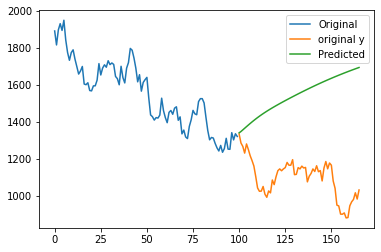

In [46]:
plt.plot(x_axis[0:100],original )
plt.plot(x_axis[100:166],original_y)
plt.plot(x_axis[100:166],test_66)
plt.legend(["Original","original y","Predicted"])
plt.show()


  
  
Now considering last 166 elements of df1 (lookback = 100 days, lookforward = 66 days)



In [69]:
scalerr=MinMaxScaler(feature_range=(0,1))

[[2076.]
 [2051.]
 [2054.]
 ...
 [2665.]
 [2593.]
 [2580.]]


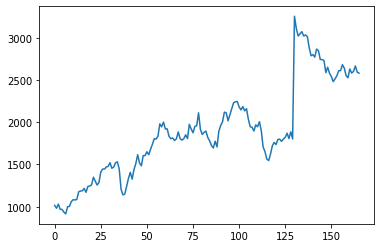

In [70]:

print(df1)
plt.plot(df1[len(df1)-166:len(df1)])

In [71]:
new_df1=df1[len(df1)-166:len(df1)]
type(new_df1)
print(new_df1.shape)

new_orig=new_df1[0:100]
print(new_orig.shape)#stores original, which is fed as input. It is unscaled
new_orig_y=new_df1[100:166]
print(new_orig_y.shape)#stores original y values. It is unscaled 

(166, 1)
(100, 1)
(66, 1)


In [72]:
print(new_orig)

[[1016. ]
 [ 982. ]
 [1031. ]
 [ 970.5]
 [ 968. ]
 [ 936. ]
 [ 915. ]
 [1000. ]
 [1003. ]
 [1060. ]
 [1083. ]
 [1080. ]
 [1086. ]
 [1176. ]
 [1186. ]
 [1189. ]
 [1217. ]
 [1171. ]
 [1240. ]
 [1245. ]
 [1258. ]
 [1349. ]
 [1302. ]
 [1257. ]
 [1285. ]
 [1411. ]
 [1446. ]
 [1446. ]
 [1470. ]
 [1478. ]
 [1521. ]
 [1455. ]
 [1469. ]
 [1520.5]
 [1531. ]
 [1445. ]
 [1206. ]
 [1140. ]
 [1150.5]
 [1240. ]
 [1336. ]
 [1407. ]
 [1326. ]
 [1440. ]
 [1512. ]
 [1615. ]
 [1518. ]
 [1484. ]
 [1605. ]
 [1605. ]
 [1650.5]
 [1615. ]
 [1681. ]
 [1740. ]
 [1806. ]
 [1801. ]
 [1835.5]
 [1980. ]
 [1946. ]
 [2001. ]
 [1920.5]
 [1921. ]
 [1832.5]
 [1805. ]
 [1813. ]
 [1784. ]
 [1803.5]
 [1885. ]
 [1806. ]
 [1788. ]
 [1805. ]
 [1850. ]
 [1806. ]
 [1975. ]
 [1920. ]
 [1875. ]
 [1951. ]
 [1959. ]
 [2111. ]
 [1916. ]
 [1855. ]
 [1880. ]
 [1895. ]
 [1819. ]
 [1780. ]
 [1724. ]
 [1695. ]
 [1775. ]
 [1707.5]
 [1893. ]
 [1961. ]
 [2005. ]
 [2119. ]
 [2111. ]
 [2016. ]
 [2090. ]
 [2160. ]
 [2230. ]
 [2241. ]
 [2245. ]]

In [73]:
x=scalerr.fit_transform(np.array(new_orig).reshape(-1,1))
new_orig_y_scaled=scalerr.fit_transform(np.array(new_orig_y).reshape(-1,1))
print(x.shape)# 100x1    Scaled
print(new_orig_y_scaled.shape)# 66x1     Scaled

(100, 1)
(66, 1)


In [56]:
#x_inp=x.reshape(1,100,1)
#print(x_inp)
#pred2=model.predict(x_inp)
#pred_unscale=scaler.inverse_transform(pred2)   # pred2 is scaled, ready to be fed into next set of input array, which goes into the predictor
#print("\n Pred_Unscale : " ,pred_unscale)    #pred_unscale stores the unscaled actual prediction-value of pred2, which is to be pushed into prediction array.

[[[0.07593985]
  [0.05037594]
  [0.08721805]
  [0.04172932]
  [0.03984962]
  [0.01578947]
  [0.        ]
  [0.06390977]
  [0.06616541]
  [0.10902256]
  [0.12631579]
  [0.12406015]
  [0.12857143]
  [0.1962406 ]
  [0.2037594 ]
  [0.20601504]
  [0.22706767]
  [0.1924812 ]
  [0.2443609 ]
  [0.2481203 ]
  [0.25789474]
  [0.32631579]
  [0.29097744]
  [0.25714286]
  [0.27819549]
  [0.37293233]
  [0.39924812]
  [0.39924812]
  [0.41729323]
  [0.42330827]
  [0.4556391 ]
  [0.40601504]
  [0.41654135]
  [0.45526316]
  [0.46315789]
  [0.39849624]
  [0.21879699]
  [0.16917293]
  [0.17706767]
  [0.2443609 ]
  [0.31654135]
  [0.36992481]
  [0.30902256]
  [0.39473684]
  [0.44887218]
  [0.52631579]
  [0.45338346]
  [0.42781955]
  [0.51879699]
  [0.51879699]
  [0.55300752]
  [0.52631579]
  [0.57593985]
  [0.62030075]
  [0.66992481]
  [0.66616541]
  [0.69210526]
  [0.80075188]
  [0.77518797]
  [0.81654135]
  [0.75601504]
  [0.75639098]
  [0.68984962]
  [0.66917293]
  [0.67518797]
  [0.65338346]
  [0.66804

In [74]:
x_inp=x.reshape(1,100,1)
pred66=np.array([])

pred2=model.predict(x_inp)
pred_unscale=scalerr.inverse_transform(pred2)
pred66=np.append(pred66,pred_unscale[0][0])

while(len(pred66)<66):
  pred2=pred2.reshape(1,1,1)
  x_inp=np.append(x_inp, pred2, axis=1)
  x_inp=x_inp[:,1:101,:]
  pred2=model.predict(x_inp)
  pred_unscale=scalerr.inverse_transform(pred2)
  pred66=np.append(pred66,pred_unscale[0][0])

print(pred66)
print(pred66.shape)


[3222.45385742 3188.24682617 3158.45532227 3134.23803711 3112.0324707
 3088.70361328 3062.68237305 3033.86206055 3003.08911133 2971.62158203
 2940.7175293  2911.40673828 2884.41333008 2860.1730957  2838.89135742
 2820.60717773 2805.24291992 2792.64160156 2782.59204102 2774.84423828
 2769.12036133 2765.12524414 2762.55273438 2761.09692383 2760.45898438
 2760.35351562 2760.515625   2760.70898438 2760.72680664 2760.39648438
 2759.57958984 2758.17333984 2756.109375   2753.35083008 2749.8894043
 2745.74316406 2740.95141602 2735.57250977 2729.67749023 2723.34960938
 2716.67626953 2709.7487793  2702.6574707  2695.48901367 2688.32592773
 2681.24145508 2674.30029297 2667.55615234 2661.05249023 2654.82250977
 2648.88769531 2643.26049805 2637.94360352 2632.93188477 2628.21289062
 2623.76904297 2619.57836914 2615.61474609 2611.85107422 2608.25878906
 2604.80957031 2601.47631836 2598.23291016 2595.05541992 2591.92260742
 2588.81616211]
(66,)


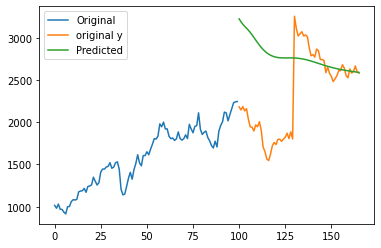

In [75]:
plt.plot(x_axis[0:100],new_orig)
plt.plot(x_axis[100:166],new_orig_y)
plt.plot(x_axis[100:166],pred66)
plt.legend(["Original","original y","Predicted"])
plt.show()